<a href="https://colab.research.google.com/github/IgorRachev27/Homework/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_2_%D1%81%D0%BE%D1%86_%D1%81%D0%B5%D1%82%D1%8C_%D1%87%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДОП Задание к ДЗ (Необязательно к выполнению, но приносит доп. балл)

# Я удалил декораторы из примера чтобы не перегружать выход и сам код лишней информацией. Здесь и так много нагромаждено получилось. Отражена суть задания

In [ ]:
from typing import Optional, List, Dict
import time
import numpy as np
from datetime import datetime
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

# часть 2

Задание с двумя звёздочками -- сгенерировать 20 случайных пользователей, случайным образом просимулировать их взаимодействия, затем собрать pandas.DataFrame с данными о том, когда пользователи были онлайн и сколько у разных пользователей общих друзей, а потом визуализировать эти данные в seaborn с помощью line plots и heatmap соответственно.

In [ ]:
class Phystech:
    uid = 0
    spisok={} # все пользователи соцсети
    exempl={} # экземпляры класса
    Last_Online={}
    
    def __init__(
        self,
        name: str,
        login: str,
        password: str,
        graduation_year: Optional[int] = None,
        birthday: Optional[datetime] = None, 
        status: Optional[str] = None,
        friends=[], # друзья
        in_friends=[], # входящие заявки
        out_friends=[], # исходящие заявки
        black_list=[], # кому запрещено добавлять в друзья
        
    ):
        self.name = name
        self.status = status
        
        self.__uid = Phystech.uid
        Phystech.uid += 1

        Phystech.spisok[self.uid]=self.name # формируем список пользователей
        Phystech.exempl[self.uid]=self # формируем экземпляры класса
        Phystech.Last_Online[self.name]=[datetime.now()]
        
        self._birthday = birthday
        self._graduation_year = graduation_year
        self.__login = login
        self.__password = password
        
        
        self.friends=friends
        self.in_friends=in_friends, # входящие заявки
        self.out_friends=out_friends, # исходящие заявки
        self.black_list=black_list
        
        
    def friend_req(self): # запрос в друзья
        a=random.choice(range(1,Phystech.uid+1))
        
        if self.name in Phystech.exempl[int(a)].black_list:
            print('вы в чёрном списке у пользователя!!!')
        else: 
            if Phystech.spisok[int(a)] not in self.out_friends[0]:
                self.out_friends[0].append(Phystech.spisok[int(a)])
                Phystech.exempl[int(a)].in_friends[0].append(self.name)
            
        print(f' исходящие заявки для {self.name} {self.out_friends}')
        print(f' входящие заявки для {Phystech.exempl[int(a)].name} {Phystech.exempl[int(a)].in_friends}')
        
        # обновляем время последнего действия
        
        Phystech.Last_Online[self.name].append(datetime.now())
        
    def black(self): # ЧС
        a=random.choice(range(1,Phystech.uid+1))
        if Phystech.spisok[int(a)] not in self.black_list:
            self.black_list.append(Phystech.spisok[int(a)])
            print(f'чёрный список для {self.name} {Phystech.exempl[list(Phystech.spisok.keys())[list(Phystech.spisok.values()).index(self.name)]].black_list}')
        # обновляем время последнего действия
        
        Phystech.Last_Online[self.name].append(datetime.now())            
            
    def accept(self): # принятие в друзья
        try:
            a=random.choice(self.in_friends[0])
            b=random.choice([1,0])
            if b==1:
                self.friends.append(a) # следующая за этой строчка находит uid человека по его ФИО
                    # list(Phystech.spisok.keys())[list(Phystech.spisok.values()).index(a)]
                Phystech.exempl[list(Phystech.spisok.keys())[list(Phystech.spisok.values()).index(a)]].friends.append(self.name)
                self.in_friends[0].remove(a)
                Phystech.exempl[list(Phystech.spisok.keys())[list(Phystech.spisok.values()).index(a)]].out_friends[0].remove(self.name)

            else:
                self.in_friends[0].remove(a)
                Phystech.exempl[list(Phystech.spisok.keys())[list(Phystech.spisok.values()).index(a)]].out_friends[0].remove(self.name)

            print(f'мои входящие заявки {self.in_friends[0]}')
            print(f'мои друзья {self.friends}')
            Phystech.Last_Online[self.name].append(datetime.now())   # обновляем время последнего действия
        except:
            pass

     
        
                
        
    def delete(self):
        try:
            a=random.choice(self.friends)
            try: 
                self.friends.remove(a)
                Phystech.exempl[list(Phystech.spisok.keys())[list(Phystech.spisok.values()).index(a)]].friends.remove(self.name)
                print(f'мои друзья {self.friends}')
                print (f'друзья того, кто нам больше не друг {Phystech.exempl[list(Phystech.spisok.keys())[list(Phystech.spisok.values()).index(a)]].friends}')
            except: print('такого друга нет')

            # обновляем время последнего действия

            Phystech.Last_Online[self.name].append(datetime.now())
        except:
            pass
            
            
    def obschee(self):
        try:
            r=Phystech.exempl[random.randint(1,20)]
            a=random.choice(r.friends)
            result = [x for x in r.friends if x in Phystech.exempl[list(Phystech.spisok.keys())[list(Phystech.spisok.values()).index(a)]].friends ]
            print(f'общие друзья: {result}')
                # обновляем время последнего действия

            Phystech.Last_Online[self.name].append(datetime.now())
        except:
            pass

In [ ]:
# списоки для генерации
familii=["Милёшин","Иванов","Петров", "Сидоров","Николян","Зорбаев","Газыев","Минкаилов", "Суюнов", "Воронцов", "Топал"]
imena=["Иван", "Григорий", "Равиль", "Эдгар", "Низами", "Эльзамин", "Игорь", "Ахмед", "Евгений", "Аслан", "Сергей", "Пётр", "Максим", "Павел"]
otchestva=["Иванович", "Петрович","Чырахбан Оглы", "Хоренович","Камаледдинович", "Саламуевич", "Владимирович","Николаевич","Андреевич", "Ильич"]
person=["person_"+str(i) for i in range(1,21)]


In [ ]:
for i in range (20):
    person[i]=Phystech(
        name=str(random.choice(familii)+" "+random.choice(imena)+' '+random.choice(otchestva)),
        birthday=datetime(year=random.randint(1940,2002) , month=random.randint(1,12), day=random.randint(1,28)),
        status='bla-'*random.randint(1,10),
        login='ovchinkin',
        graduation_year=random.randint(2020,2024),
        password=''.join(map(str, random.sample(["A","a","B","b","C","c","D","d","E","e","F","f","G","g","!","@","#","$","%","^","&","*"],8))), 
        friends=[],
        in_friends=[],
        out_friends=[],
        black_list=[],)

In [ ]:
# чёрный список
def f1():
    for i in range(random.randint(15,30)):
        Phystech.exempl[random.randint(1,20)].black()

# запрос в друзья
def f2():
    for i in range(random.randint(100,150)):
        Phystech.exempl[random.randint(1,20)].friend_req()
    # принятие заявки в друзья
def f3():
    for i in range(random.randint(80,100)):
        Phystech.exempl[random.randint(1,20)].accept()
    # удаление из друзей
def f4():
    for i in range(random.randint(10,15)):
        Phystech.exempl[random.randint(1,20)].delete()
# общие друзья
def f5():
    for i in range(random.randint(15,20)):
        Phystech.exempl[random.randint(1,20)].obschee()        

for i in range(random.randint(10,20)):
    random.choice([f1(),f2(),f3(),f4(),f5()])

чёрный список для Минкаилов Сергей Андреевич ['Милёшин Низами Саламуевич']
чёрный список для Газыев Низами Саламуевич ['Топал Низами Владимирович']
чёрный список для Минкаилов Григорий Петрович ['Зорбаев Иван Хоренович']
чёрный список для Николян Эдгар Хоренович ['Минкаилов Аслан Иванович']
чёрный список для Топал Низами Владимирович ['Газыев Равиль Иванович']
чёрный список для Топал Пётр Петрович ['Зорбаев Евгений Саламуевич']
чёрный список для Суюнов Иван Камаледдинович ['Топал Пётр Петрович']
чёрный список для Сидоров Аслан Ильич ['Зорбаев Евгений Саламуевич']
чёрный список для Минкаилов Григорий Иванович ['Минкаилов Григорий Иванович']
чёрный список для Минкаилов Аслан Иванович ['Минкаилов Григорий Петрович']
чёрный список для Сидоров Низами Николаевич ['Зорбаев Иван Хоренович']
чёрный список для Зорбаев Сергей Саламуевич ['Милёшин Эдгар Владимирович']
чёрный список для Газыев Равиль Иванович ['Минкаилов Григорий Иванович']
чёрный список для Газыев Низами Саламуевич ['Топал Низами 

 исходящие заявки для Воронцов Игорь Владимирович (['Зорбаев Евгений Саламуевич', 'Зорбаев Иван Хоренович', 'Минкаилов Сергей Андреевич', 'Минкаилов Аслан Иванович', 'Иванов Павел Владимирович', 'Милёшин Эдгар Владимирович'],)
 входящие заявки для Милёшин Эдгар Владимирович (['Газыев Равиль Иванович', 'Минкаилов Григорий Иванович', 'Воронцов Игорь Владимирович'],)
 исходящие заявки для Сидоров Аслан Ильич (['Милёшин Низами Саламуевич', 'Топал Низами Владимирович', 'Минкаилов Григорий Иванович', 'Суюнов Иван Камаледдинович', 'Николян Эдгар Хоренович', 'Милёшин Эдгар Владимирович'],)
 входящие заявки для Милёшин Эдгар Владимирович (['Газыев Равиль Иванович', 'Минкаилов Григорий Иванович', 'Воронцов Игорь Владимирович', 'Сидоров Аслан Ильич'],)
 исходящие заявки для Николян Эдгар Хоренович (['Газыев Низами Саламуевич', 'Минкаилов Григорий Иванович', 'Суюнов Иван Камаледдинович', 'Минкаилов Сергей Андреевич', 'Газыев Пётр Петрович', 'Сидоров Низами Николаевич'],)
 входящие заявки для Газые

 исходящие заявки для Воронцов Игорь Владимирович (['Воронцов Игорь Владимирович', 'Минкаилов Аслан Иванович', 'Топал Пётр Петрович', 'Топал Низами Владимирович', 'Газыев Пётр Петрович', 'Николян Эдгар Хоренович'],)
 входящие заявки для Николян Эдгар Хоренович (['Милёшин Низами Саламуевич', 'Минкаилов Григорий Петрович', 'Воронцов Игорь Владимирович'],)
 исходящие заявки для Минкаилов Сергей Андреевич (['Зорбаев Иван Хоренович', 'Минкаилов Аслан Иванович', 'Газыев Пётр Петрович', 'Милёшин Эдгар Владимирович', 'Сидоров Аслан Ильич', 'Сидоров Низами Николаевич', 'Милёшин Низами Саламуевич'],)
 входящие заявки для Милёшин Эдгар Владимирович (['Сидоров Аслан Ильич', 'Минкаилов Сергей Андреевич'],)
 исходящие заявки для Суюнов Иван Камаледдинович (['Топал Низами Владимирович', 'Воронцов Игорь Владимирович', 'Суюнов Иван Камаледдинович', 'Иванов Павел Владимирович'],)
 входящие заявки для Иванов Павел Владимирович (['Николян Эдгар Хоренович', 'Зорбаев Иван Хоренович', 'Сидоров Аслан Ильич', 

 исходящие заявки для Минкаилов Сергей Андреевич (['Воронцов Игорь Владимирович', 'Газыев Пётр Петрович'],)
 входящие заявки для Газыев Пётр Петрович (['Газыев Низами Саламуевич', 'Топал Пётр Петрович', 'Зорбаев Евгений Саламуевич', 'Николян Эдгар Хоренович', 'Суюнов Иван Камаледдинович', 'Сидоров Низами Николаевич', 'Милёшин Низами Саламуевич', 'Газыев Пётр Петрович', 'Минкаилов Сергей Андреевич'],)
 исходящие заявки для Минкаилов Аслан Иванович (['Сидоров Низами Николаевич'],)
 входящие заявки для Сидоров Низами Николаевич (['Минкаилов Аслан Иванович'],)
вы в чёрном списке у пользователя!!!
 исходящие заявки для Газыев Пётр Петрович (['Суюнов Иван Камаледдинович', 'Минкаилов Сергей Андреевич', 'Топал Пётр Петрович', 'Газыев Пётр Петрович', 'Иванов Павел Владимирович', 'Зорбаев Евгений Саламуевич'],)
 входящие заявки для Николян Эдгар Хоренович ([],)
 исходящие заявки для Сидоров Низами Николаевич (['Газыев Пётр Петрович', 'Топал Низами Владимирович', 'Минкаилов Аслан Иванович'],)
 вх

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# чёрный список
for i in range(random.randint(15,30)):
    Phystech.exempl[random.randint(1,20)].black()

# запрос в друзья
for i in range(random.randint(300,500)):
    Phystech.exempl[random.randint(1,20)].friend_req()

# принятие заявки в друзья
for i in range(random.randint(170,250)):
    Phystech.exempl[random.randint(1,20)].accept()

# удаление из друзей
for i in range(random.randint(30,70)):
    Phystech.exempl[random.randint(1,20)].delete()

# DF

In [ ]:
ser=[]
for i in Phystech.Last_Online.keys():
    ser1=pd.Series(Phystech.Last_Online[i])
    ser.append(ser1)
ser

k=pd.concat(ser,axis=1)
k.columns=[i for i in Phystech.Last_Online.keys()]
k.fillna(0)

,Минкаилов Григорий Иванович,Минкаилов Сергей Андреевич,Зорбаев Евгений Саламуевич,Зорбаев Иван Хоренович,Минкаилов Аслан Иванович,Суюнов Иван Камаледдинович,Сидоров Аслан Ильич,Николян Эдгар Хоренович,Иванов Павел Владимирович,Газыев Пётр Петрович,Зорбаев Сергей Саламуевич,Милёшин Эдгар Владимирович,Газыев Равиль Иванович,Сидоров Низами Николаевич,Топал Низами Владимирович,Минкаилов Григорий Петрович,Воронцов Игорь Владимирович,Газыев Низами Саламуевич,Милёшин Низами Саламуевич,Топал Пётр Петрович
0,2020-12-05 23:44:49.273582,2020-12-05 23:44:49.273618,2020-12-05 23:44:49.273643,2020-12-05 23:44:49.273667,2020-12-05 23:44:49.273689,2020-12-05 23:44:49.273712,2020-12-05 23:44:49.273734,2020-12-05 23:44:49.273756,2020-12-05 23:44:49.273778,2020-12-05 23:44:49.273800,2020-12-05 23:44:49.273822,2020-12-05 23:44:49.273845,2020-12-05 23:44:49.273866,2020-12-05 23:44:49.273887,2020-12-05 23:44:49.273908,2020-12-05 23:44:49.273928,2020-12-05 23:44:49.273949,2020-12-05 23:44:49.273969,2020-12-05 23:44:49.273990,2020-12-05 23:44:49.274011
1,2020-12-05 23:44:49.286586,2020-12-05 23:44:49.286381,2020-12-05 23:44:49.287972,2020-12-05 23:44:49.288303,2020-12-05 23:44:49.286604,2020-12-05 23:44:49.286547,2020-12-05 23:44:49.286566,2020-12-05 23:44:49.286490,2020-12-05 23:44:49.286752,2020-12-05 23:44:49.286949,2020-12-05 23:44:49.286641,2020-12-05 23:44:49.287643,2020-12-05 23:44:49.286659,2020-12-05 23:44:49.286623,2020-12-05 23:44:49.286509,2020-12-05 23:44:49.286469,2020-12-05 23:44:49.288469,2020-12-05 23:44:49.286437,2020-12-05 23:44:49.286838,2020-12-05 23:44:49.286528
2,2020-12-05 23:44:49.287192,2020-12-05 23:44:49.288238,2020-12-05 23:44:49.288202,2020-12-05 23:44:49.288891,2020-12-05 23:44:49.286808,2020-12-05 23:44:49.287828,2020-12-05 23:44:49.286731,2020-12-05 23:44:49.287076,2020-12-05 23:44:49.288809,2020-12-05 23:44:49.287760,2020-12-05 23:44:49.292672,2020-12-05 23:44:49.288385,2020-12-05 23:44:49.286706,2020-12-05 23:44:49.286868,2020-12-05 23:44:49.288679,2020-12-05 23:44:49.288362,2020-12-05 23:44:49.289197,2020-12-05 23:44:49.286679,2020-12-05 23:44:49.286997,2020-12-05 23:44:49.287230
3,2020-12-05 23:44:49.287926,2020-12-05 23:44:49.289989,2020-12-05 23:44:49.288624,2020-12-05 23:44:49.289073,2020-12-05 23:44:49.287037,2020-12-05 23:44:49.288336,2020-12-05 23:44:49.288655,2020-12-05 23:44:49.291134,2020-12-05 23:44:49.289503,2020-12-05 23:44:49.290790,2020-12-05 23:44:49.292984,2020-12-05 23:44:49.290393,2020-12-05 23:44:49.286772,2020-12-05 23:44:49.287998,2020-12-05 23:44:49.289052,2020-12-05 23:44:49.288525,2020-12-05 23:44:49.289561,2020-12-05 23:44:49.288270,2020-12-05 23:44:49.287114,2020-12-05 23:44:49.288559
4,2020-12-05 23:44:49.290056,2020-12-05 23:44:49.290180,2020-12-05 23:44:49.290086,2020-12-05 23:44:49.289693,2020-12-05 23:44:49.287885,2020-12-05 23:44:49.289809,2020-12-05 23:44:49.288700,2020-12-05 23:44:49.292226,2020-12-05 23:44:49.289961,2020-12-05 23:44:49.293056,2020-12-05 23:44:49.293151,2020-12-05 23:44:49.291937,2020-12-05 23:44:49.287706,2020-12-05 23:44:49.288136,2020-12-05 23:44:49.289931,2020-12-05 23:44:49.290547,2020-12-05 23:44:49.289839,2020-12-05 23:44:49.288978,2020-12-05 23:44:49.287153,2020-12-05 23:44:49.289281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12-05 23:44:50.550480,0,0,0,0,0,0
287,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12-05 23:44:50.551359,0,0,0,0,0,0
288,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12-05 23:44:50.552510,0,0,0,0,0,0
289,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12-05 23:44:50.553412,0,0,0,0,0,0


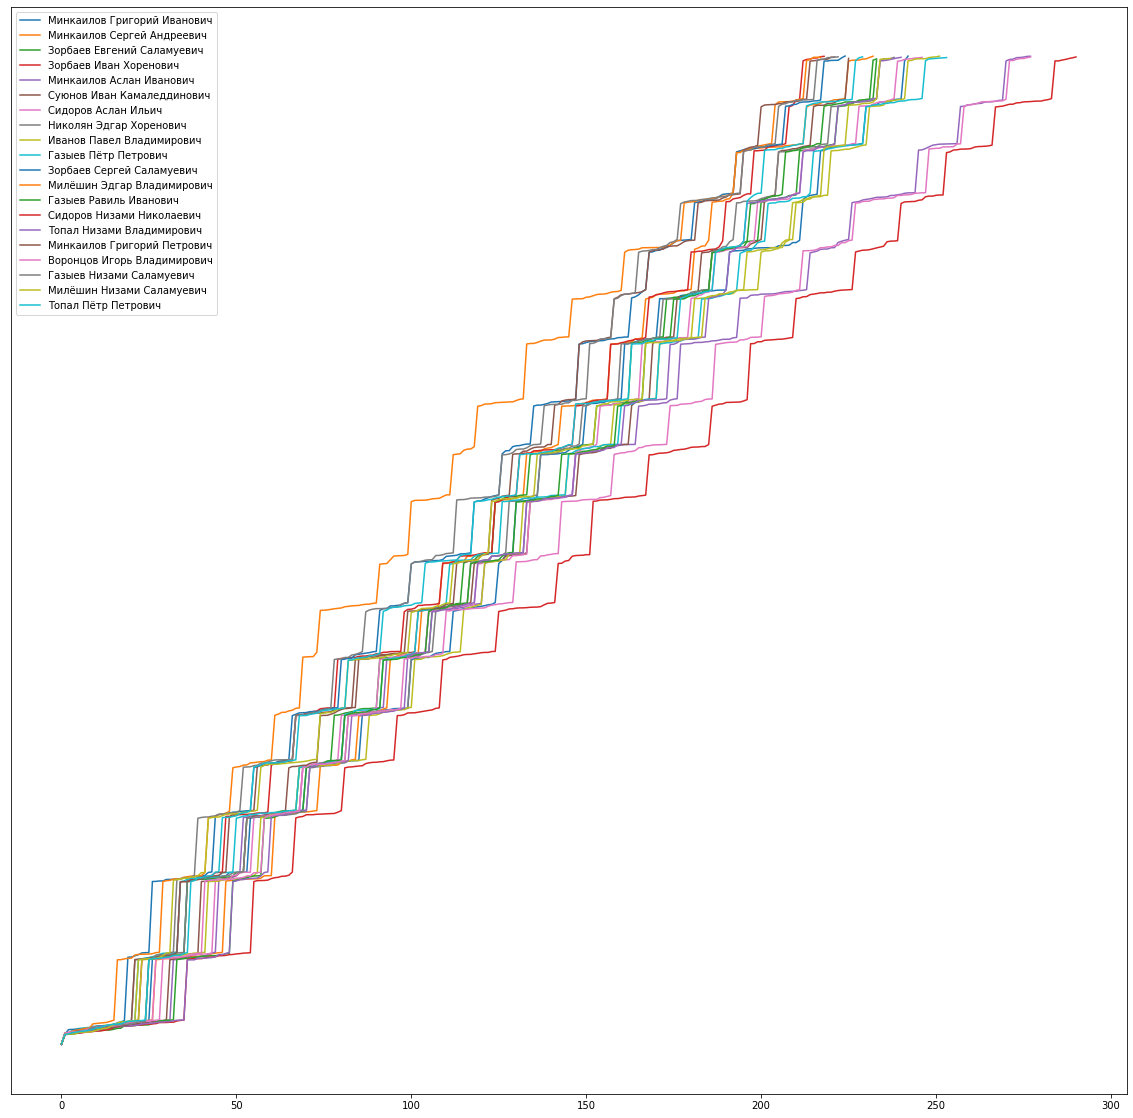

In [ ]:
k.plot(figsize=(20,20))

# heatmap

In [ ]:
od=[]
for k in range(1,21):
    for s in range(1,21):
        od.append(len([x for x in Phystech.exempl[s].friends if x in Phystech.exempl[k].friends]))
heatmap=np.array(od).reshape(20,20)
heatmap

array([[25, 12, 22, 15, 23, 24, 21, 19, 25, 35, 24, 22, 19, 31, 11, 11,
        27, 17, 17, 19],
       [11, 25, 25, 17, 42, 25, 27, 23, 34, 31, 26, 23, 19, 28, 20, 13,
        26, 21, 24, 20],
       [14, 23, 37, 16, 46, 35, 23, 25, 35, 40, 30, 21, 22, 46, 21, 21,
        29, 29, 24, 22],
       [12, 18, 28, 23, 26, 27, 23, 21, 29, 33, 24, 20, 22, 28, 18, 17,
        19, 21, 19, 19],
       [20, 24, 34, 15, 50, 32, 24, 28, 40, 41, 32, 26, 23, 45, 21, 19,
        31, 28, 26, 24],
       [19, 19, 27, 16, 39, 39, 31, 27, 35, 34, 28, 26, 23, 37, 21, 17,
        26, 23, 27, 24],
       [19, 19, 27, 16, 39, 37, 32, 24, 32, 36, 29, 24, 23, 40, 21, 16,
        29, 25, 28, 24],
       [17, 20, 26, 17, 34, 26, 20, 34, 30, 37, 23, 24, 16, 38, 20, 16,
        22, 15, 23, 22],
       [16, 19, 25, 21, 30, 29, 21, 24, 46, 39, 27, 27, 19, 41, 20, 19,
        23, 21, 24, 19],
       [24, 21, 35, 19, 36, 32, 26, 29, 39, 49, 31, 27, 24, 50, 21, 19,
        32, 28, 27, 24],
       [21, 17, 31, 16, 40, 25

In [ ]:
final=pd.DataFrame(heatmap,index=[i for i in Phystech.Last_Online.keys()], columns=[i for i in Phystech.Last_Online.keys()])
final

,Минкаилов Григорий Иванович,Минкаилов Сергей Андреевич,Зорбаев Евгений Саламуевич,Зорбаев Иван Хоренович,Минкаилов Аслан Иванович,Суюнов Иван Камаледдинович,Сидоров Аслан Ильич,Николян Эдгар Хоренович,Иванов Павел Владимирович,Газыев Пётр Петрович,Зорбаев Сергей Саламуевич,Милёшин Эдгар Владимирович,Газыев Равиль Иванович,Сидоров Низами Николаевич,Топал Низами Владимирович,Минкаилов Григорий Петрович,Воронцов Игорь Владимирович,Газыев Низами Саламуевич,Милёшин Низами Саламуевич,Топал Пётр Петрович
Минкаилов Григорий Иванович,25,12,22,15,23,24,21,19,25,35,24,22,19,31,11,11,27,17,17,19
Минкаилов Сергей Андреевич,11,25,25,17,42,25,27,23,34,31,26,23,19,28,20,13,26,21,24,20
Зорбаев Евгений Саламуевич,14,23,37,16,46,35,23,25,35,40,30,21,22,46,21,21,29,29,24,22
Зорбаев Иван Хоренович,12,18,28,23,26,27,23,21,29,33,24,20,22,28,18,17,19,21,19,19
Минкаилов Аслан Иванович,20,24,34,15,50,32,24,28,40,41,32,26,23,45,21,19,31,28,26,24
Суюнов Иван Камаледдинович,19,19,27,16,39,39,31,27,35,34,28,26,23,37,21,17,26,23,27,24
Сидоров Аслан Ильич,19,19,27,16,39,37,32,24,32,36,29,24,23,40,21,16,29,25,28,24
Николян Эдгар Хоренович,17,20,26,17,34,26,20,34,30,37,23,24,16,38,20,16,22,15,23,22
Иванов Павел Владимирович,16,19,25,21,30,29,21,24,46,39,27,27,19,41,20,19,23,21,24,19
Газыев Пётр Петрович,24,21,35,19,36,32,26,29,39,49,31,27,24,50,21,19,32,28,27,24


([<matplotlib.axis.YTick at 0x7ff115acc250>,
 [Text(0, 0, 'Минкаилов Григорий Иванович'),
  Text(0, 0, 'Минкаилов Сергей Андреевич'),
  Text(0, 0, 'Зорбаев Евгений Саламуевич'),
  Text(0, 0, 'Зорбаев Иван Хоренович'),
  Text(0, 0, 'Минкаилов Аслан Иванович'),
  Text(0, 0, 'Суюнов Иван Камаледдинович'),
  Text(0, 0, 'Сидоров Аслан Ильич'),
  Text(0, 0, 'Николян Эдгар Хоренович'),
  Text(0, 0, 'Иванов Павел Владимирович'),
  Text(0, 0, 'Газыев Пётр Петрович'),
  Text(0, 0, 'Зорбаев Сергей Саламуевич'),
  Text(0, 0, 'Милёшин Эдгар Владимирович'),
  Text(0, 0, 'Газыев Равиль Иванович'),
  Text(0, 0, 'Сидоров Низами Николаевич'),
  Text(0, 0, 'Топал Низами Владимирович'),
  Text(0, 0, 'Минкаилов Григорий Петрович'),
  Text(0, 0, 'Воронцов Игорь Владимирович'),
  Text(0, 0, 'Газыев Низами Саламуевич'),
  Text(0, 0, 'Милёшин Низами Саламуевич'),
  Text(0, 0, 'Топал Пётр Петрович')])

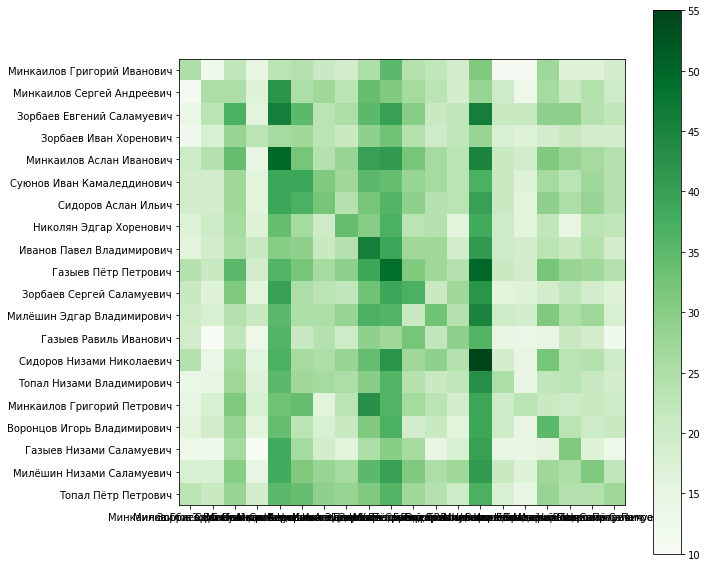

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(final, cmap="Greens")
plt.colorbar() # шкала интенсивности цвета справа от графика
plt.xticks(range(len(final.columns)), final.columns) #меняем по оси х значения на названия
plt.yticks(range(len(final)), final.index)